## Mazes generator test

In [3]:
from bin.maze import Maze

m = Maze(size=(59, 99), verbose=False)
m.generate()

# QLearning

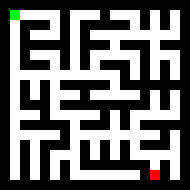

In [11]:
from bin.maze import Maze
m = Maze(size=(19, 19), verbose=False)
m.generate()
m.draw()

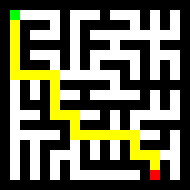

In [12]:
from bin.walker import Walker
from random import choice, randint
import IPython.display
import numpy as np
from time import sleep

GAMMA = 0.8
REWARD = 15

class QLearning:
    def __init__(self, walker, states, actions, episode=50):
        self.qmatrix = np.zeros((len(states), len(actions)))
        self.walker = walker
        self.states = states
        self.actions = actions
        self.episode = episode
    
    def train(self):
        for _ in range(self.episode):
            while not self.walker.is_end():              
                available_actions = self.walker.get_available_moves()

                for action in available_actions:
                    reward = 0
                    if self.walker.target_is_end(action):
                        reward = REWARD
                        
                    ############ TODO ##############
                    next_action_award = []
                    self.walker.assume_move(action)
                    further_available_actions = self.walker.get_available_moves()
                    for further_action in further_available_actions:
                        cell_indx = self.states.index(self.walker.get_current_cell())
                        action_indx = self.actions.index(further_action)
                        next_action_award.append(self.qmatrix[cell_indx, action_indx])
                    
                    self.walker.undo_move()
                    #############################$$
                    
                    cell_indx = self.states.index(self.walker.get_current_cell())
                    action_indx = self.actions.index(action)
                    self.qmatrix[cell_indx, action_indx] = reward + GAMMA * max(next_action_award)
                    
                self.walker.move(choice(available_actions))
                
            self.walker.reset()
    
    def get_best_move(self):
        cell_indx = self.states.index(self.walker.get_current_cell())
        scores = self.qmatrix[cell_indx]
        if scores.min() == scores.max():
            return choice(self.walker.get_available_moves())
        else:
            best_score_indx = np.argmax(scores, axis=0)
            return self.walker.get_all_moves()[best_score_indx]

w = Walker(m)
ql = QLearning(w, m.get_all_passages(), w.get_all_moves(), episode=10)
ql.train()

while not w.is_end():
    action = ql.get_best_move()
    w.move(action)
    m.draw()
    sleep(0.2)

## Generate 1000 mazes for Deep QLearning

In [ ]:
from bin.maze import Maze
import pickle as pkl

maze_set = []
for _ in range(1000):
    m = Maze(size=(29, 29))
    m.generate()
    maze_set.append(m)

with open("data/maze-set.pkl", 'wb') as f:
    pkl.dump(maze_set, f)
